In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning Pollution Dataset

In [71]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [72]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [73]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [74]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [ ]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [95]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

C:\Users\galav\AppData\Local\Temp\ipykernel_21968\793794818.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [110]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]

heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart.shape


(30299, 8)

In [111]:
heart['Break_out_Age'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Age' else np.nan, axis=1)
heart['Break_out_Gender'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Gender' else np.nan, axis=1)
heart['Break_out_Overall'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Overall' else np.nan, axis=1)
heart['Break_out_Race'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Race' else np.nan, axis=1)
heart = heart.drop(columns=["Break_out","Break_Out_Category"])
heart.shape

(30299, 10)

In [ ]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [105]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")

In [104]:
merged_data = merged[merged["State"].notna()]
merged_data = merged_data.drop(columns=["State"])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21997 entries, 255 to 30298
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21997 non-null  int64  
 1   LocationDesc       21997 non-null  object 
 2   Category           21997 non-null  object 
 3   Topic              21997 non-null  object 
 4   Age-Standardized   12255 non-null  float64
 5   Crude              21651 non-null  float64
 6   Break_out_Age      9717 non-null   object 
 7   Break_out_Gender   3682 non-null   object 
 8   Break_out_Overall  1841 non-null   object 
 9   Break_out_Race     6757 non-null   object 
 10  NO2 Mean           21997 non-null  float64
 11  NO2 1st Max Value  21997 non-null  float64
 12  NO2 AQI            21997 non-null  float64
 13  O3 Mean            21997 non-null  float64
 14  O3 1st Max Value   21997 non-null  float64
 15  O3 AQI             21997 non-null  float64
 16  SO2 Mean           21997 

In [ ]:
# merged_data.to_csv("data/merged_data.csv",index=False)

## Outliers

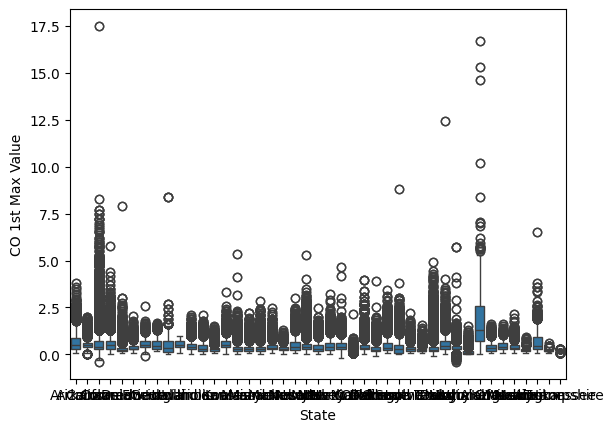

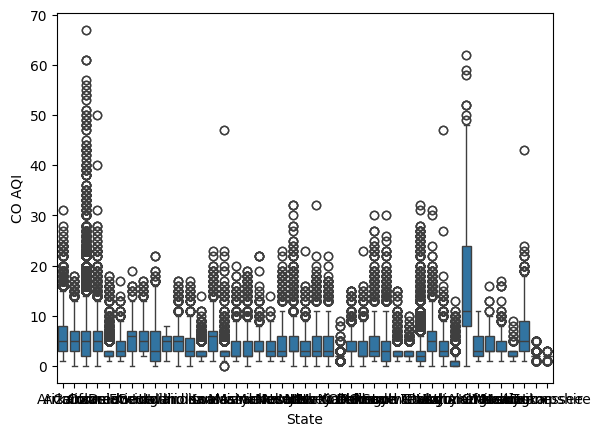

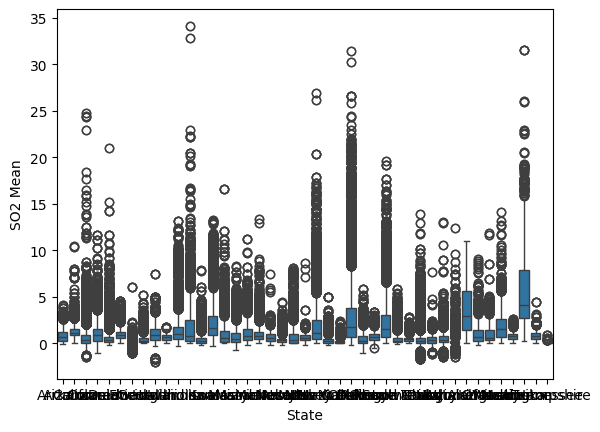

In [107]:
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

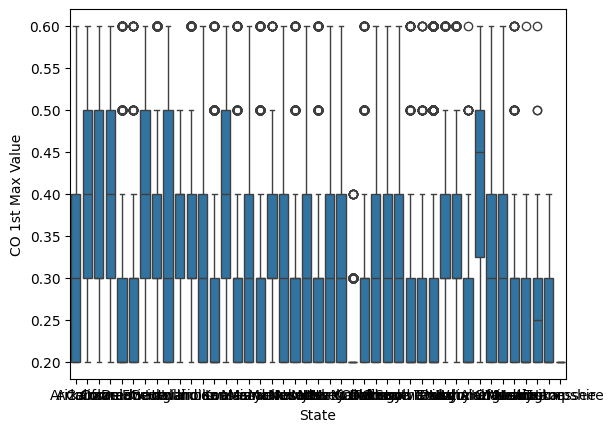

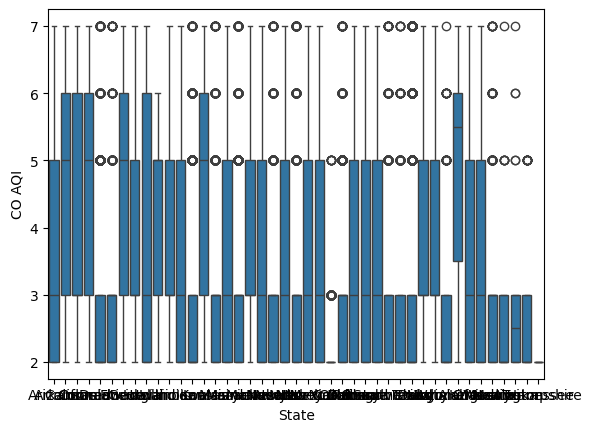

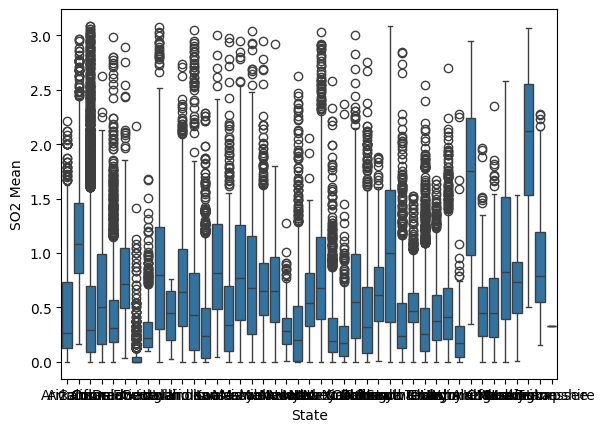

In [108]:
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()